@author : krishan subudhi

@data source : https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset/data

In [2]:
file = 'datasets_549966_1265502_complete.csv'
with open(file) as f:
    print(f.readline())
    print(f.readline())

Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered

2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0



In [3]:
import pandas as pd
df = pd.read_csv(file)
df.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0


# Find worst affected state

In [4]:
max_death = df.groupby('Name of State / UT').Death.max().sort_values(ascending = False)
max_death.head(10)

Name of State / UT
Maharashtra       5893
Delhi             2035
Gujarat           1618
Tamil Nadu         666
West Bengal        529
Madhya Pradesh     495
Uttar Pradesh      488
Rajasthan          333
Telangana          198
Telengana          156
Name: Death, dtype: int64

https://matplotlib.org/3.2.1/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')


fig, ax = plt.subplots(figsize=(12,4))
fig.figsize = (14,3)

ax.bar(max_death.index, max_death.values)
#ax.pie(x= max_death.values, labels = max_death.index)

ax.tick_params(axis='x', labelrotation=90)
_=ax.set_title('Statewise death count')

# Check infection and rate of death for India

In [88]:
df.head(5)

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0


In [89]:
india_stats = df.groupby('Date').sum()
india_stats

,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
Date,,,,,,,,
2020-01-30,10.8505,76.2711,1,0,0,0,0,0
2020-01-31,10.8505,76.2711,1,0,0,0,0,0
2020-02-01,10.8505,76.2711,2,0,0,1,0,0
2020-02-02,10.8505,76.2711,3,0,0,1,0,0
2020-02-03,10.8505,76.2711,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2020-06-14,817.4984,2872.4580,313486,9195,162379,12477,311,8049
2020-06-15,817.4984,2872.4580,325452,9520,169798,11966,325,7419
2020-06-16,817.4984,2872.4580,335407,9900,180013,9955,380,10215


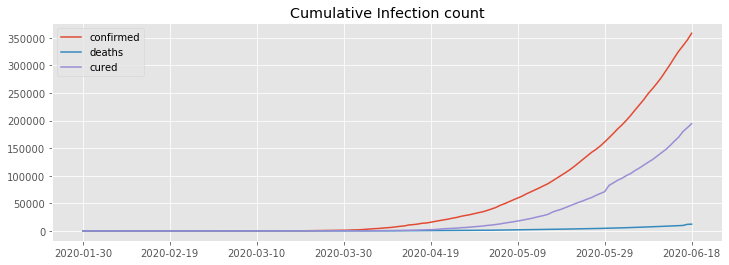

In [98]:

fig, ax = plt.subplots(figsize=(12,4))
fig.figsize = (14,3)

ax.plot(india_stats[['Total Confirmed cases','Death','Cured/Discharged/Migrated']])
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.legend(['confirmed','deaths', 'cured'])
_=ax.set_title('Cumulative Infection count')

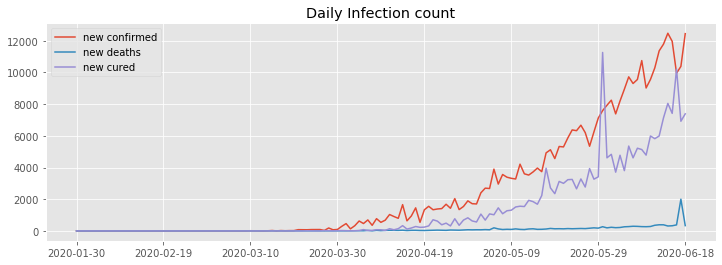

In [99]:

fig, ax = plt.subplots(figsize=(12,4))
fig.figsize = (14,3)

ax.plot(india_stats[['New cases','New deaths','New recovered']])

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.legend(['new confirmed','new deaths', 'new cured'])
_=ax.set_title('Daily Infection count')

Text(0.5, 1.0, 'Cumulative Death Percentage')

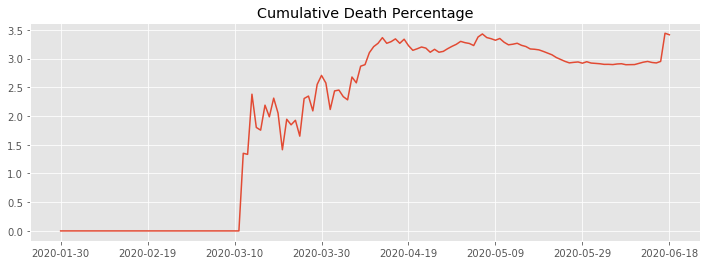

In [115]:

fig, ax = plt.subplots(figsize=(12,4))
fig.figsize = (14,3)

ax.plot(india_stats['Death']/india_stats['Total Confirmed cases']*100)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_title('Cumulative Death Percentage')